## Введение

*Тайфуны - это тип тропических циклонов, встречающихся в северной части Тихого океана. Они характеризуются сильными ветрами, интенсивными дождями и могут вызывать наводнения и разрушения на суше.*

Данные для проекта были получены с платформы kaggle: **Asian Typhoon Dataset, 1951-2022 (RSMC Best Track)** в формате csv (ссылка на датасет: https://www.kaggle.com/datasets/skyil7/asian-typhoon-dataset-1951-2022-rsmc-best-track?select=typhoon_data.csv) и включали в себя:
1) **International number ID** - номер тропического циклона
2) **year** - год
3) **month** - месяц
4) **day** - день
5) **hour** - час
6) **grade** - тип тропического циклона
7) **Latitude of the centre** - широта центра циклона
8) **Longitude of the centre** - долгота центра циклона (*Данные по широте и долготе в данном датасете умножены на 10*)
9) **Central pressure** - давление в центре циклона

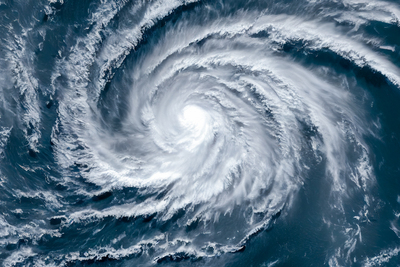

## Загрузка данных


In [32]:
import pandas as pd
df = pd.read_csv('data/typhoon_data.csv', sep = ';')
print(df)

       International number ID  year  month  day  hour  \
0                         5101  1951      2   19     6   
1                         5101  1951      2   19    12   
2                         5101  1951      2   19    18   
3                         5101  1951      2   20     0   
4                         5101  1951      2   20     6   
...                        ...   ...    ...  ...   ...   
68619                     2225  2022     12   11    12   
68620                     2225  2022     12   11    18   
68621                     2225  2022     12   12     0   
68622                     2225  2022     12   12     6   
68623                     2225  2022     12   12    12   

                                            grade  Latitude of the center  \
0                             Tropical Depression                     200   
1                             Tropical Depression                     200   
2                             Tropical Depression                     23

## Выбор необходимой информации

Так как файл содержит множество типов (grade) тропических циклонов, ознакомимся с количеством **сильнейших** из них.

In [34]:
name = df['grade'].tolist() #преобразование данных в список
tropical_storms =[]
for i in name:
    if 'Severe Tropical Storm'in i: #найдем все сильнейшие тропические циклоны
        tropical_storms.append(i) #добавим их в пустой список 
print(len(tropical_storms)) #количество сильнейших тайфунов в наборе данных

6895


## Создание списка с сильнейшими тропическими циклонами

In [36]:
typhoons_data = df.values.tolist()
tropical_storm = [] 
for j in typhoons_data:
    for i in j:
        if 'Severe Tropical Storm' in str(i):
            tropical_storm.append(j) #добавляет в список нужные значения
            break
for k in tropical_storm:
    print (k) #выводится каждая строчка из списка 

[7701, 1977, 3, 28, 0, 'Severe Tropical Storm', 56, 1588, 990]
[7701, 1977, 3, 28, 6, 'Severe Tropical Storm', 61, 1582, 996]
[7701, 1977, 3, 28, 12, 'Severe Tropical Storm', 66, 1575, 1000]
[7702, 1977, 6, 15, 6, 'Severe Tropical Storm', 194, 1171, 980]
[7702, 1977, 6, 15, 12, 'Severe Tropical Storm', 204, 1174, 980]
[7702, 1977, 6, 15, 18, 'Severe Tropical Storm', 212, 1178, 980]
[7702, 1977, 6, 16, 0, 'Severe Tropical Storm', 219, 1180, 980]
[7702, 1977, 6, 16, 6, 'Severe Tropical Storm', 232, 1183, 985]
[7703, 1977, 7, 19, 0, 'Severe Tropical Storm', 172, 1157, 985]
[7703, 1977, 7, 19, 6, 'Severe Tropical Storm', 170, 1136, 985]
[7703, 1977, 7, 19, 12, 'Severe Tropical Storm', 170, 1131, 985]
[7703, 1977, 7, 19, 18, 'Severe Tropical Storm', 170, 1125, 980]
[7703, 1977, 7, 20, 18, 'Severe Tropical Storm', 196, 1098, 975]
[7703, 1977, 7, 21, 0, 'Severe Tropical Storm', 202, 1085, 980]
[7703, 1977, 7, 21, 6, 'Severe Tropical Storm', 205, 1070, 980]
[7704, 1977, 7, 22, 0, 'Severe Tropi

## Количество сильнейших тайфунов в летние месяцы и процент от их общего числа



In [38]:
summer_severe_storms = []
for storm in tropical_storm:  
    if storm[2] == 6 or storm[2] == 7 or storm[2] == 8:  # [2]- 3 элемент списка с данными по месяцам, 6,7,8-летние месяцы
        summer_severe_storms.append(storm)
print(len(summer_severe_storms))
print((len(summer_severe_storms)/len(tropical_storms))*100,'%')

2920
42.349528643944886 %


## Максимальное и минимальное давление в центре сильнейших тайфунов
*Давление в центре циклона - это один из ключевых факторов, определяющих его интенсивность и разрушительную силу.* 


In [40]:
pressure = []
for storm in tropical_storm:
    pressure.append(storm[8]) #[8] - 9 элемент с данными по давлению
max_pressure = pressure [0]
min_pressure = pressure [0]
for i in pressure:
    if i > max_pressure:
        max_pressure = i
    if i < min_pressure:
        min_pressure = i
print('Максимальное давление:', max_pressure)
print('Минимальное давление:', min_pressure)

Максимальное давление: 1000
Минимальное давление: 955


## Создание списка со словарями для всех тайфунов 

In [42]:
headings = ['International number ID', 'year', 'month', 'day', 'hour', 'grade', 'Latitude of the center', 'Longitude of the center', 'Central pressure']
typhoons = [] #создан пустой список
for i in range(len(df)):
    typhoon = {} #создан пустой словарь
    for j in range(len(headings)):
        typhoon[headings[j]] = df[headings[j]][i] # headings[j] - столбцы с заголовками, i - строки
    typhoons.append(typhoon) #в список добавлены словари с тайфунами
for i in typhoons[:5]: #выведено только 5 элементов, так как jupyter не может открыть весь список
    print(i)

{'International number ID': 5101, 'year': 1951, 'month': 2, 'day': 19, 'hour': 6, 'grade': 'Tropical Depression', 'Latitude of the center': 200, 'Longitude of the center': 1385, 'Central pressure': 1010}
{'International number ID': 5101, 'year': 1951, 'month': 2, 'day': 19, 'hour': 12, 'grade': 'Tropical Depression', 'Latitude of the center': 200, 'Longitude of the center': 1385, 'Central pressure': 1010}
{'International number ID': 5101, 'year': 1951, 'month': 2, 'day': 19, 'hour': 18, 'grade': 'Tropical Depression', 'Latitude of the center': 230, 'Longitude of the center': 1421, 'Central pressure': 1000}
{'International number ID': 5101, 'year': 1951, 'month': 2, 'day': 20, 'hour': 0, 'grade': 'Tropical Cyclone of TS intensity or higher', 'Latitude of the center': 250, 'Longitude of the center': 1460, 'Central pressure': 994}
{'International number ID': 5101, 'year': 1951, 'month': 2, 'day': 20, 'hour': 6, 'grade': 'Tropical Cyclone of TS intensity or higher', 'Latitude of the center

## Суммарное количество тропических циклонов за каждый год

In [44]:
cyclones_per_year = {} #создан пустой словарь
for cyclone in typhoons:
    year = cyclone['year'] 
    if year in cyclones_per_year:
        cyclones_per_year[year] += 1 #Если год уже есть в словаре, количество циклонов увеличивается на 1 для этого года
    else:
        cyclones_per_year[year] = 1 #Если год еще не встречался, создается новая запись в словаре для этого года 
for year in cyclones_per_year:
    print('Год:', year,' Количество тропических циклонов:', cyclones_per_year[year])

Год: 1951  Количество тропических циклонов: 792
Год: 1952  Количество тропических циклонов: 836
Год: 1953  Количество тропических циклонов: 864
Год: 1954  Количество тропических циклонов: 727
Год: 1955  Количество тропических циклонов: 858
Год: 1956  Количество тропических циклонов: 621
Год: 1957  Количество тропических циклонов: 811
Год: 1958  Количество тропических циклонов: 980
Год: 1959  Количество тропических циклонов: 804
Год: 1960  Количество тропических циклонов: 1077
Год: 1961  Количество тропических циклонов: 955
Год: 1962  Количество тропических циклонов: 1125
Год: 1963  Количество тропических циклонов: 1105
Год: 1964  Количество тропических циклонов: 1129
Год: 1965  Количество тропических циклонов: 1263
Год: 1966  Количество тропических циклонов: 1218
Год: 1967  Количество тропических циклонов: 1417
Год: 1968  Количество тропических циклонов: 1260
Год: 1969  Количество тропических циклонов: 709
Год: 1970  Количество тропических циклонов: 803
Год: 1971  Количество тропически

In [17]:
id = input() #вводится номер необходимого тайфуна
for i in typhoons:
    if i['International number ID'] == int(id):
        print ('Год:',i['year'],' Месяц:', i['month'], ' День:', i['day'], ' Час:', i['hour'], ' Тип:', i['grade'], ' Широта:', i['Latitude of the center']/10, ' Долгота:', i['Longitude of the center']/10,' Давление:', i['Central pressure'])
        #выводится вся информация о тайфуне и координаты переводятся в нужный формат

 7711


Год: 1977  Месяц: 9  День: 12  Час: 6  Тип: Tropical Depression  Широта: 15.0  Долгота: 144.5  Давление: 1004
Год: 1977  Месяц: 9  День: 12  Час: 12  Тип: Tropical Depression  Широта: 15.6  Долгота: 144.5  Давление: 1004
Год: 1977  Месяц: 9  День: 12  Час: 18  Тип: Tropical Depression  Широта: 16.1  Долгота: 144.5  Давление: 1004
Год: 1977  Месяц: 9  День: 13  Час: 0  Тип: Tropical Depression  Широта: 16.6  Долгота: 144.5  Давление: 1000
Год: 1977  Месяц: 9  День: 13  Час: 6  Тип: Tropical Depression  Широта: 17.1  Долгота: 144.4  Давление: 1000
Год: 1977  Месяц: 9  День: 13  Час: 12  Тип: Tropical Depression  Широта: 17.6  Долгота: 144.3  Давление: 998
Год: 1977  Месяц: 9  День: 13  Час: 18  Тип: Tropical Depression  Широта: 18.0  Долгота: 144.2  Давление: 996
Год: 1977  Месяц: 9  День: 14  Час: 0  Тип: Tropical Depression  Широта: 18.5  Долгота: 144.0  Давление: 996
Год: 1977  Месяц: 9  День: 14  Час: 6  Тип: Tropical Depression  Широта: 19.0  Долгота: 143.7  Давление: 992
Год: 1977 

## Выводы

В ходе данного исследования были проанализированы сильнейшие тропические циклоны за период с 1951 по 2022. Были получены данные о их общем числе, о их количестве в летние месяцы и процент от общего числа, а также максимальное и минимальное давление в центре сильнейших циклонов. Был создан словарь для всех типов тайфунов и посчитано число циклонов за каждый год, а также написан код, благодаря которому, зная номер циклона, можно вывести всю необходимую информацию о нем. В результате исследования можно сделать следующие **выводы**:
1) Итоговое количество сильнейших тропических циклонов (тайфунов) за период с 1951 по 2022 год достигло **6895**
2) Летом доля сильнейших тайфунов составила **42%** от их общего числа
3) Давление в центре сильнейших циклонов колебалось **от 955 до 1000**
4) Судя по данным для всех тайфунов их количество **не увеличивается** со временем. Чаще всего они происходили в **1960-е** и **1990-е** годы.

*Данная база данных и проект могут пригодится мне в написании курсовой работы на тему "Влияние климатических изменений на активность тропических циклонов в северо-западной части Тихого океана", так как есть возможность проанализировать несколько параметров для определенных циклонов, а также благодаря наличию координат нанести центры и маршруты циклонов на карту.*